In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
data_main = pd.read_csv("F:/DataSets/English Characters/A_Z Handwritten Data.csv",encoding='utf-8', dtype=np.float32)

In [4]:
map_dic = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

In [5]:
data_main

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y_train_full = data_main['0']
y_train_full.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 0, dtype: float32

In [7]:
X_train_full = data_main.drop(['0'],axis =1)
X_train_full.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Normalization
X_train_full =  X_train_full/255

In [9]:
#Reshape
X_train_full = X_train_full.values.reshape(-1, 28, 28, 1)

In [10]:
X_train_full[1]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

	 Character No. :  25.0
	 Character :  Z


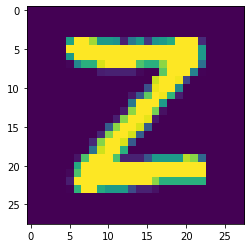

In [11]:
i = 372449 #item number
plt.imshow(X_train_full[i])
print("\t Character No. : ",y_train_full[i])
print("\t Character : ",map_dic[int(y_train_full[i])])

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

## Training Model

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.30, random_state=42)

In [109]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

260715
111735
260715
111735


In [110]:
model = keras.models.Sequential()

In [111]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(26, activation='softmax'))

In [112]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 26)                2626      
Total params: 268,226
Trainable params: 268,226
Non-trainable params: 0
__________________________________________________

In [114]:
w , b = model.layers[2].get_weights()
print(w)
print(b)

[[-0.00958908  0.00369985 -0.00048406 ... -0.07357587 -0.02742664
  -0.04121105]
 [ 0.06529447 -0.07138363  0.05846708 ... -0.0041897   0.06529114
  -0.03365361]
 [ 0.05264154 -0.03162553  0.01164634 ... -0.04076129  0.01914155
  -0.03140609]
 ...
 [ 0.0286293   0.03434967 -0.00212682 ... -0.0253939   0.06216036
   0.01375941]
 [ 0.00351328  0.05891068 -0.01023991 ...  0.05314083 -0.06726155
   0.07313393]
 [-0.00130923  0.045985    0.04936647 ...  0.02184285 -0.01658475
   0.06170258]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [115]:
model.compile(loss="sparse_categorical_crossentropy",  #for labled output
              optimizer = "sgd", #stochastic gradient desent
              metrics=["accuracy"])

In [116]:
model_hist = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
8148/8148 [==============================] - 23s 3ms/step - loss: 1.4502 - accuracy: 0.5913 - val_loss: 0.4222 - val_accuracy: 0.8838
Epoch 2/10
8148/8148 [==============================] - 23s 3ms/step - loss: 0.5967 - accuracy: 0.8256 - val_loss: 0.2966 - val_accuracy: 0.9185
Epoch 3/10
8148/8148 [==============================] - 24s 3ms/step - loss: 0.4680 - accuracy: 0.8643 - val_loss: 0.2484 - val_accuracy: 0.9303
Epoch 4/10
8148/8148 [==============================] - 25s 3ms/step - loss: 0.4085 - accuracy: 0.8808 - val_loss: 0.2023 - val_accuracy: 0.9440
Epoch 5/10
8148/8148 [==============================] - 31s 4ms/step - loss: 0.3608 - accuracy: 0.8938 - val_loss: 0.1827 - val_accuracy: 0.9498
Epoch 6/10
8148/8148 [==============================] - 44s 5ms/step - loss: 0.3338 - accuracy: 0.9020 - val_loss: 0.1663 - val_accuracy: 0.9538
Epoch 7/10
8148/8148 [==============================] - 49s 6ms/step - loss: 0.3124 - accuracy: 0.9068 - val_loss: 0.1515 - val_ac

In [117]:
model_hist.params

{'verbose': 1, 'epochs': 10, 'steps': 8148}

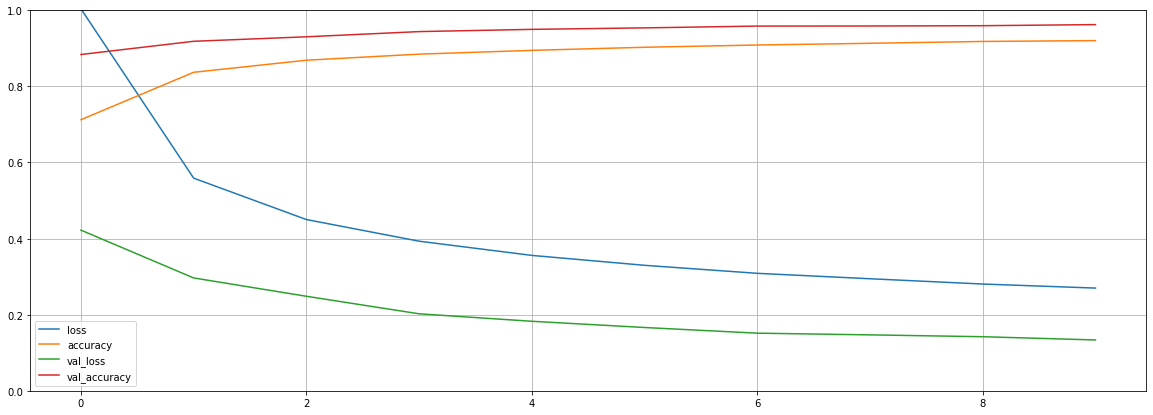

In [118]:
pd.DataFrame(model_hist.history).plot(figsize =(20,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [119]:
model.save('Eng_Char_Rec.h5')

## Test Model

In [120]:
del model

In [6]:
from tensorflow.keras.models import load_model

In [50]:
Eng_Rec_Model = load_model('Eng_Char_Rec.h5')

In [8]:
y_prob = Eng_Rec_Model.predict(X_test)

NameError: name 'X_test' is not defined

In [124]:
y_prob.round(2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.05, 0.93, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [125]:
y_pred = Eng_Rec_Model.predict_classes(X_test)
y_pred

C:\Users\Siddhant\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([12, 18,  2, ..., 18,  1, 11], dtype=int64)

In [126]:
X_test[1].shape

(28, 28, 1)

In [127]:
X_test[1]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

	 Prob :  [9.2571020e-11 1.8369986e-11 4.2738306e-11 4.3096310e-13 4.2470771e-12
 5.9000631e-11 1.9662761e-11 7.8483890e-07 1.6218360e-10 3.3542440e-06
 1.6018311e-07 4.9536120e-10 9.0738958e-08 7.3785450e-06 1.2163393e-12
 1.8042025e-10 4.8017704e-11 1.1667517e-12 2.1200615e-08 1.8287947e-06
 1.1339299e-05 9.9563557e-01 5.4042423e-05 1.1487656e-05 4.2739580e-03
 9.5742314e-10]

	 Char No :  21

	 Char :  V


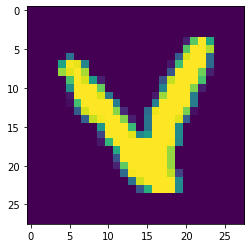

In [330]:
i = 1300
#item number
plt.imshow(X_test[i])
print("\t Prob : ",y_prob[i])
print("\n\t Char No : ",y_pred[i])
print("\n\t Char : ",map_dic[int(y_pred[i])])

# Manual Testing

In [9]:
import cv2

In [10]:
test_img = cv2.imread("C:/Users/Siddhant/Data Science/Manual_Test_Eng_Char/u.JPG") 

In [11]:
len(test_img)

28

In [12]:
test_img.shape

(28, 28, 3)

In [13]:
test_img = cv2.resize(test_img, (28,28))

In [14]:
test_img.shape

(28, 28, 3)

In [15]:
gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

In [16]:
test_img = test_img/255

(28, 28, 3)


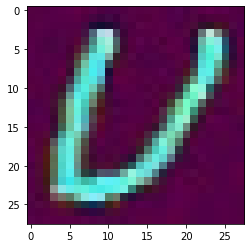

In [17]:
plt.imshow(test_img)
print(test_img.shape)

In [18]:
gray_r = np.reshape(gray,(28,28,1))

In [19]:
gray_r = gray_r/255

In [20]:
gray_r = gray_r.round(2)
gray_r.shape

(28, 28, 1)

(28, 28, 1)


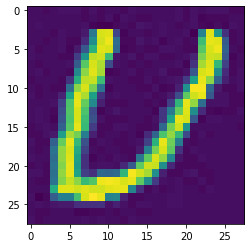

In [21]:
plt.imshow(gray_r)
print(gray_r.shape)

In [22]:
gray_r_i = cv2.bitwise_not(gray_r)

(28, 28)


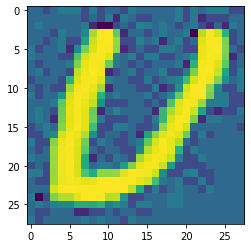

In [23]:
plt.imshow(gray_r_i)
print(gray_r_i.shape)

In [24]:
pred = Eng_Rec_Model.predict_classes( np.array([gray_r,]))
pred

C:\Users\Siddhant\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([20], dtype=int64)


	 Char No :  [20]

	 Char :  U


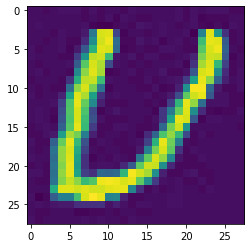

In [25]:
plt.imshow(gray_r)
#print("\t Prob : ",y_prob[i])
print("\n\t Char No : ",pred)
print("\n\t Char : ",map_dic[int(pred)])

# Live Testing

In [26]:
import time
import cv2

Below cell start the camera and will take a snapshot when you hit SPACE. It will also quit if you hit ESC.

In [111]:
cam = cv2.VideoCapture(0)
cv2.namedWindow("test")
img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "frame_1.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()

frame_1.png written!
Escape hit, closing...


In [112]:
test_img = cv2.imread("C:/Users/Siddhant/Data Science/frame_1.png") 

In [113]:
test_img.shape

(480, 640, 3)

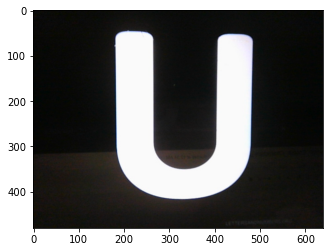

In [114]:
plt.imshow(test_img)

In [115]:
test_img = cv2.resize(test_img, (28,28))

In [116]:
gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

In [117]:
gray_r = np.reshape(gray,(28,28,1))

In [118]:
gray_rs = gray_r.round(2)
gray_rs.shape

(28, 28, 1)

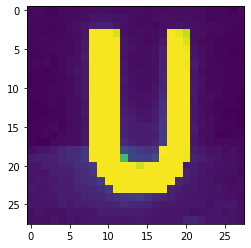

In [119]:
plt.imshow(gray_rs)

In [120]:
prob = Eng_Rec_Model.predict(np.array([gray_rs,]))
print(prob)
print(max(prob[0]))
print(np.where(prob == max(prob[0])))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0.]]
1.0
(array([0], dtype=int64), array([20], dtype=int64))


In [121]:
pred = Eng_Rec_Model.predict_classes(np.array([gray_rs,]))
pred

array([20], dtype=int64)


	 Char No :  [20]

	 Char :  U


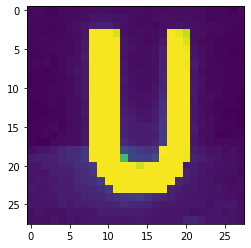

In [122]:
plt.imshow(gray_r)
#print("\t Prob : ",y_prob[i])
print("\n\t Char No : ",pred)
print("\n\t Char : ",map_dic[int(pred)])